In [1]:
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\jafar\Downloads\Students_Performance.csv")

In [4]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33
...,...,...,...,...,...,...,...,...
995,male,group E,some college,standard,completed,99,87,81
996,male,group A,some college,standard,completed,100,96,86
997,male,group D,some college,standard,completed,100,97,99
998,male,group E,associate's degree,free/reduced,completed,100,100,93


# a)

In [5]:
df=pd.DataFrame(data)

In [6]:
print(df['gender'].value_counts())

female    518
male      482
Name: gender, dtype: int64


# b)  visualising students 'parental level of education'

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

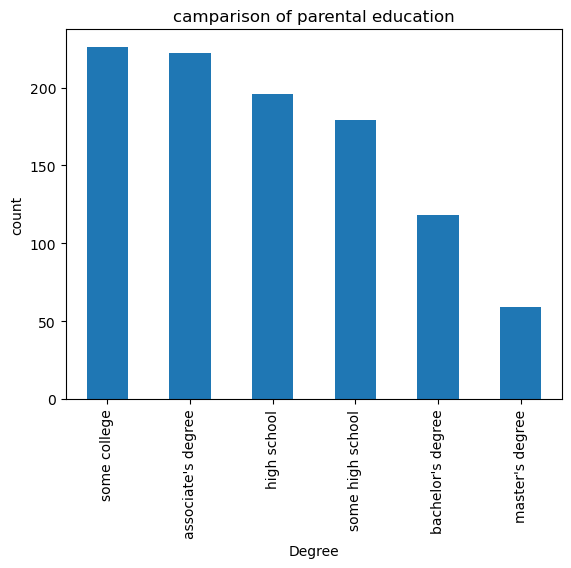

In [8]:
data['parental level of education'].value_counts
data['parental level of education'].value_counts(dropna=False).plot.bar()
plt.xlabel('Degree')
plt.ylabel('count')
plt.title('camparison of parental education')
plt.show()

In [9]:
# Filtering out parents' education level
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

[Text(0, 0, 'some high school'),
 Text(1, 0, 'high school'),
 Text(2, 0, 'some college'),
 Text(3, 0, "associate's degree"),
 Text(4, 0, "bachelor's degree"),
 Text(5, 0, "master's degree")]

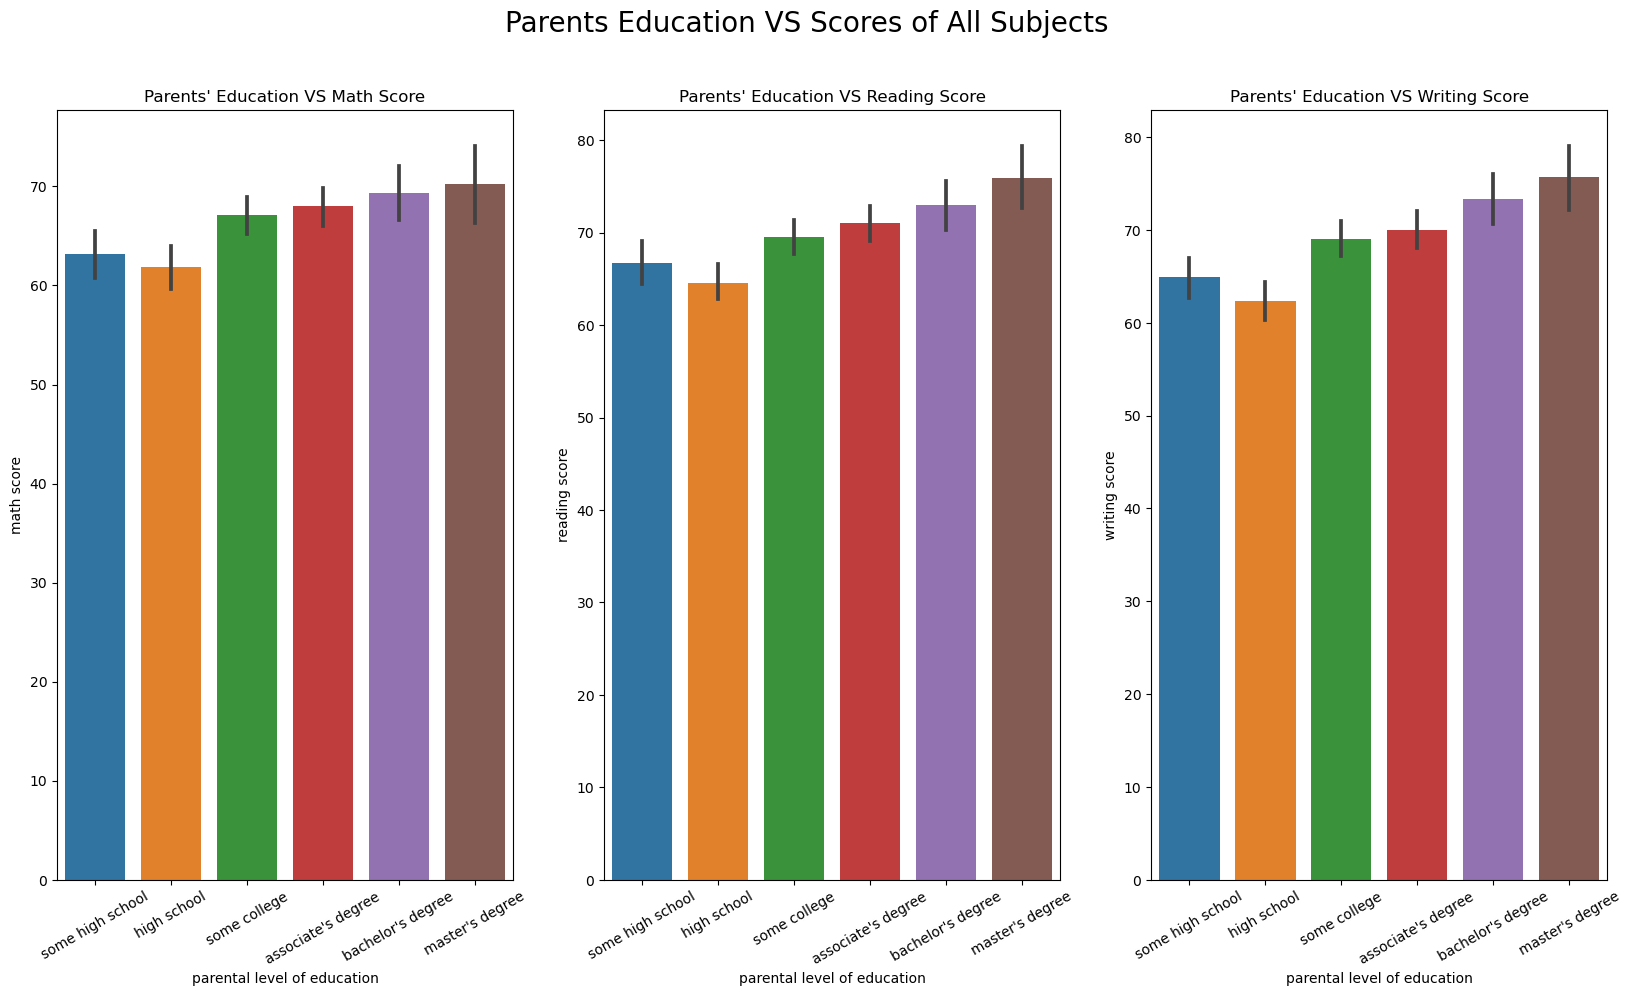

In [10]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))
fig.suptitle('Parents Education VS Scores of All Subjects', fontsize=20)

sns.barplot(data=data,x='parental level of education', y='math score', ax=ax1)
ax1.title.set_text('Parents\' Education VS Math Score')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=data,x='parental level of education', y='reading score', ax=ax2)
ax2.title.set_text('Parents\' Education VS Reading Score')
ax2.set_xticklabels(ax1.get_xticklabels(), rotation=30)

sns.barplot(data=data,x='parental level of education', y='writing score', ax=ax3)
ax3.title.set_text('Parents\' Education VS Writing Score')
ax3.set_xticklabels(ax1.get_xticklabels(), rotation=30)

# c)

In [11]:
data.mean()

C:\Users\jafar\AppData\Local\Temp\ipykernel_28756\531903386.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.mean()


math score       66.001
reading score    69.195
writing score    68.119
dtype: float64

In [12]:
#Creating a new column for average of the three scores
data['score average'] = (data[['math score','reading score','writing score']]).mean(axis=1)
data.head() 

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000
1,female,group B,high school,free/reduced,none,8,24,23,18.333333
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000
3,female,group B,some college,standard,none,11,38,32,27.000000
4,female,group C,some college,free/reduced,none,22,39,33,31.333333


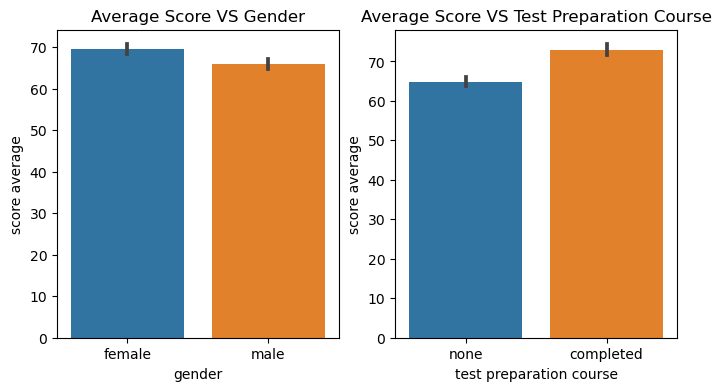

In [13]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(8, 4))

sns.barplot(y=data['score average'], x=data['gender'], ax=ax4)
ax4.title.set_text('Average Score VS Gender')

sns.barplot(y=data['score average'], x=data['test preparation course'], ax=ax5)
ax5.title.set_text('Average Score VS Test Preparation Course')

In [14]:
#we can conclude,average score against gender shows that female students performance was good in all test.
#and average score against test preparation course shows student who have completed the course performed well in test.

# d)

In [15]:
data['Scoring Variation'] = data[['math score','writing score','reading score']].std(axis=1)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,Scoring Variation
0,female,group C,some high school,free/reduced,none,0,17,10,9.000000,8.544004
1,female,group B,high school,free/reduced,none,8,24,23,18.333333,8.962886
2,female,group B,some high school,free/reduced,none,18,32,28,26.000000,7.211103
3,female,group B,some college,standard,none,11,38,32,27.000000,14.177447
4,female,group C,some college,free/reduced,none,22,39,33,31.333333,8.621678


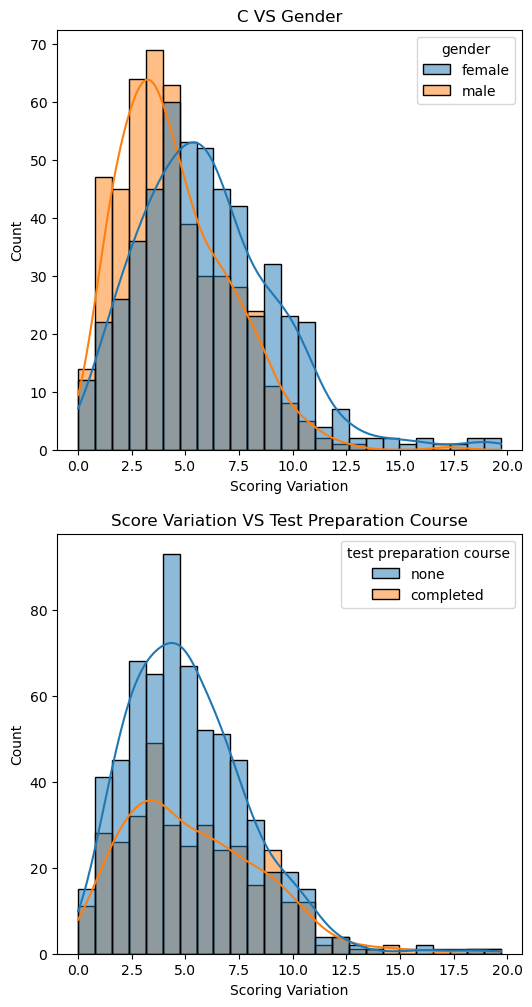

In [16]:
fig, (ax6, ax7) = plt.subplots(2, 1, figsize=(6, 12))

sns.histplot(x=data['Scoring Variation'],hue=data['gender'], kde=True, ax=ax6)
ax6.title.set_text('C VS Gender')

sns.histplot(x=data['Scoring Variation'],hue=data['test preparation course'], kde=True, ax=ax7)
ax7.title.set_text('Score Variation VS Test Preparation Course')

# e)

In [17]:
cut_off_score = np.percentile(data['math score'].values,75)
eligible_students = data[data['math score'] >= cut_off_score] 
eligible_students.sort_values('math score',ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,score average,Scoring Variation
999,male,group E,bachelor's degree,standard,completed,100,100,100,100.000000,0.000000
998,male,group E,associate's degree,free/reduced,completed,100,100,93,97.666667,4.041452
997,male,group D,some college,standard,completed,100,97,99,98.666667,1.527525
996,male,group A,some college,standard,completed,100,96,86,94.000000,7.211103
517,female,group E,associate's degree,standard,none,100,100,100,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
854,male,group D,some high school,standard,completed,77,68,69,71.333333,4.932883
855,male,group E,associate's degree,free/reduced,completed,77,69,68,71.333333,4.932883
856,male,group E,some high school,standard,completed,77,76,77,76.666667,0.577350
415,female,group B,master's degree,free/reduced,completed,77,97,94,89.333333,10.785793


# CASE STUDY ON TESTING OF HYPOTHESIS

In [19]:
data1=pd.read_csv(r"C:\Users\jafar\Downloads\Sales_add.csv")
data1

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [23]:
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# a)

In [24]:
#here we use the t test


#H0: Digital marketing  increases the sales.
#H1: Digital marketing doesnot increases the sales.

In [25]:
t,pv = ttest_ind(data1['Sales_before_digital_add(in $)'],data1['Sales_After_digital_add(in $)'])

In [26]:
if pv<0.05:
    print('Reject Null Hypothesis')
else:
    print('Accept Null Hypothesis')

Reject Null Hypothesis


In [ ]:
#so we can conclude that  digital marketing increases the sales,thta is there is a increament

# b)

In [28]:
data2 = pd.crosstab(data1['Region'],data1['Manager'])

In [29]:
chi, p_v,_,_ = chi2_contingency(data2)

In [30]:
if p_v<0.05:
    print("Rejecting Independence")
else:
    print("Accepting Independence")


Accepting Independence


so we can conclude that 'region' and 'manager' are independent of each other